# Модель предсказания оттока клиентов оператора связи

# Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic)

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- personal_new.csv - персональные данные клиента
    - gender - пол
    - SeniorCitizen - наличие пенсионного статуса по возрасту
    - Partner - наличие супруга/супруги
    - Dependents - наличие иждивенцев
- contract_new.csv - информация о договоре
    - BeginDate - дата начала пользования услугами
    - EndDate - дата окончания пользования услугами
    - Type - тип договора: ежемесячный, годовой и т.д
    - PaperlessBilling - выставления счёта по электронной почте
    - PaymentMethod - способ оплаты
    - MonthlyCharges - ежемесячные траты на услуги
    - TotalCharges - всего потрачено денег на услуги
- internet_new.csv - информация об интернет-услугах
    - InternetService - наличие услуг Интернет
    - OnlineSecurity - межсетевой экран
    - OnlineBackup - облачное хранилище файлов для резервного копирования данных
    - DeviceProtection - антивирус
    - TechSupport - выделенная линия технической поддержки
    - StreamingTV - онлайн-ТВ
    - StreamingMovies - онлайн-кинотеатр
- phone_new.csv - информация об услугах телефонии
    - MultipleLines - возможность подключения телефонного аппарата к нескольким линиям одновременно
    
Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# Цель

Построение модели, которая на основе данных о клиенте, договоре, об интернет-услугах и об услугах телефонии предскажет уход клиента. Что поможет снизить убытки, связанные неэффективными акциями по удержанию клиентов с помощью промо-купонов, скидок и прочих пакетов стимулирования.

# План 

1. Предобработка данных
    - Загрузка и объединение таблиц по столбцу customerID
    - Предобработка данных
    - Создание целевого признака на основе столбца EndDate
    - Создание синтетических признаков 
2. Анализ и подготовка данных
    - Обработка типов данных столбцов
    - Изучение числовых признаков
    - Обработка пропусков 
    - Изучение категориальных признаков
    - Изучение корреляции признаков
3. Обучение модели
    - Разделение данных на выборки
    - Кодирование и масштабирование данных
    - Обучение различных моделей с различными гипперпараметрами
    - Выбор лучшей модели
4. Тестирование модели
    - Проверка модели на тестовых данных 
    - Построение графика ROC, матрицы ошибок
    - Определение важности признаков 
5. Вывод

## Предобработка данных

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 10.9 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 82.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
!pip install phik

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


### Библиотеки 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import phik
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve
RANDOM_STATE = 11092023 

### Загрузка данных

In [4]:
try:
    contract_data = pd.read_csv("https://code.s3.yandex.net/datasets/contract_new.csv")
    personal_data = pd.read_csv("https://code.s3.yandex.net/datasets/personal_new.csv")
    internet_data = pd.read_csv("https://code.s3.yandex.net/datasets/internet_new.csv")
    phone_data = pd.read_csv("https://code.s3.yandex.net/datasets/phone_new.csv")
except:
    contract_data = pd.read_csv("/datasets/contract_new.csv")
    personal_data = pd.read_csv("/datasets/personal_new.csv")
    internet_data = pd.read_csv("/datasets/internet_new.csv")
    phone_data = pd.read_csv("/datasets/phone_new.csv")

In [5]:
data = contract_data.merge(personal_data, how="left", on="customerID")\
                   .merge(internet_data, how="left", on="customerID")\
                   .merge(phone_data, how="left", on="customerID")

In [6]:
data = data.set_index('customerID')

### Предобработка данных

In [7]:
def analyze_dataframe(df):
    display("Первые строчки:", df.head())
    display("Последние строчки:", df.tail())
    display("Случайные строчки:", df.sample(5))
    display("Информация о каждом столбце:", df.describe())
    display("Общая информация:")
    df.info()
    display("Явные дубликаты:", df.duplicated().sum())
    display("Сортировка и количество пропущенных значений:", df.isnull().sum().sort_values())

In [8]:
analyze_dataframe(data)

'Первые строчки:'

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


'Последние строчки:'

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,7251.82,Male,0,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,No


'Случайные строчки:'

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
4295-YURET,2015-06-01,No,Two year,Yes,Credit card (automatic),72.60,4472.16,Female,1,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,No
4510-HIMLV,2019-09-01,No,Month-to-month,Yes,Electronic check,69.80,352.49,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
1379-FRVEB,2018-11-01,No,Month-to-month,Yes,Electronic check,91.00,1365.0,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
8824-RWFXJ,2019-07-01,No,Month-to-month,Yes,Mailed check,56.15,400.91,Male,0,Yes,Yes,DSL,No,Yes,Yes,No,No,No,No
4568-TTZRT,2019-05-01,No,Month-to-month,No,Mailed check,20.40,187.27,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


'Информация о каждом столбце:'

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


'Общая информация:'

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

'Явные дубликаты:'

4

'Сортировка и количество пропущенных значений:'

BeginDate              0
Dependents             0
SeniorCitizen          0
gender                 0
TotalCharges           0
Partner                0
PaymentMethod          0
PaperlessBilling       0
Type                   0
EndDate                0
MonthlyCharges         0
MultipleLines        682
StreamingMovies     1526
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
dtype: int64

Выводы:
1. Последовательность столбцов логична
2. Явных дубликатов - нет
3. Столбцы стоит привести к однородному виду, слова разделим дефисом, всё приведём к нижнему регистру
4. На первый взгляд данные выглядят неплохо - пропуски в большинстве связанны с отсутствием у клиентов подключения к услугам интернета или услугам телефонии
5. Типы данных у некоторых столбцов стоит изменить, столбцы BeginDate и EndDate нужно привести к типу datetime, остальные столбцы требуют более подробного изучения

Стандатизируем название столбцов

In [9]:
data.columns = data.columns.str.replace(r'(?<=[a-z])([A-Z])', r'-\1',regex=True).str.lower()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin-date         7043 non-null   object 
 1   end-date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless-billing  7043 non-null   object 
 4   payment-method     7043 non-null   object 
 5   monthly-charges    7043 non-null   float64
 6   total-charges      7043 non-null   object 
 7   gender             7043 non-null   object 
 8   senior-citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet-service   5517 non-null   object 
 12  online-security    5517 non-null   object 
 13  online-backup      5517 non-null   object 
 14  device-protection  5517 non-null   object 
 15  tech-support       5517 non-null   object 
 16  streaming-tv  

Изменим тип данных столбцов begin-date и end-date 

In [11]:
data['begin-date'] = pd.to_datetime(data['begin-date'])
data['end-date'] = pd.to_datetime(data['end-date'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           1101 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

Теперь данны выглядт лучше

### Создание целевого признака

Целевой признак - клиент ушёл/не ушёл 

In [13]:
data['task'] = data['end-date'].notna().astype(int)

In [14]:
data['task'].value_counts()

0    5942
1    1101
Name: task, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           1101 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

### Создание синтетических признаков

Добавим 1 признак 'day-use' - сколько дней клиент пользовался услугами, для этого пропуски в столбце end-date заполню последней датой - 1 февраля 2020

In [16]:
data['end-date'].fillna(pd.to_datetime('2020-02-01'), inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

In [18]:
data.head()

,begin-date,end-date,type,paperless-billing,payment-method,monthly-charges,total-charges,gender,senior-citizen,partner,dependents,internet-service,online-security,online-backup,device-protection,tech-support,streaming-tv,streaming-movies,multiple-lines,task
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0


In [19]:
data['day-use'] = (data['end-date'] - data['begin-date']).dt.days

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

В будущем, столбцы end-date и begin-date могут вызвать утечки данных, удалим эти столбцы

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

### Промежуточный вывод

В нашем распоряжении данные о 7043 клиентах

1. Последовательность столбцов логична
2. Явных дубликатов - нет
3. Были стандатизированны названия столбцов
4. На первый взгляд данные выглядят неплохо - пропуски в большинстве связанны с отсутствием у клиентов подключения к услугам интернета или услугам телефонии
5. Был изменён тип данных у столбцов begin-date и end-date на datetime64, остальные столбцы требуют более подробного изучения
6. Был добавлен целевой признак 'task' - бинарный признак, где значение 1 - клиент ушёл, 0 - клиент не ушёл
7. Был добавлен синтетический признак 'day-use' - сколько дней клиент пользуется услугами
8. Для избежания утечки данных - после анализа данных и перед разделением данных на выборки потребуется удалить столбцы 'begin-date' и 'end-date'

Можем переходить к детальному анализу

## Анализ данных 

### Обработка типов данных столбцов

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   object        
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

К числовым признакам также можно отнести - total-charges. Столбец senior-citizen - больше категориальный, чем числовой. Столбец total-charges приведём к числовому типу, столбец senior-citizen для упрощения анализа данных изменим тип данных на object. У остальных столбцов проблем с типом данных - нет.

Изменим тип данных столбца - total-charges

In [23]:
data['total-charges'] = pd.to_numeric(data['total-charges'], errors='coerce')
data.loc[data['total-charges'].isna()]

,begin-date,end-date,type,paperless-billing,payment-method,monthly-charges,total-charges,gender,senior-citizen,partner,...,internet-service,online-security,online-backup,device-protection,tech-support,streaming-tv,streaming-movies,multiple-lines,task,day-use
customerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,...,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0,0
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,0
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,0
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0,0
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,0
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0


Причина пропусков в total-charges - клиенты заключившие договора в день актуальности данных, причин не отображения данных может быть несколько - не внесение данных в таблицу, не поступление платежа. Предположу, что для таких клиентов total-charges примерно равен monthly-charges

Посмотрим на все строки, где дата начала пользования услугами - 1 февраля 2020 года

In [24]:
data.loc[data['begin-date'] == '2020-01-01']

,begin-date,end-date,type,paperless-billing,payment-method,monthly-charges,total-charges,gender,senior-citizen,partner,...,internet-service,online-security,online-backup,device-protection,tech-support,streaming-tv,streaming-movies,multiple-lines,task,day-use
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,...,DSL,No,Yes,No,No,No,No,NaN,0,31
7310-EGVHZ,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),20.20,22.22,Male,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
3413-BMNZE,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),45.25,45.25,Male,1,No,...,DSL,No,No,No,No,No,No,No,0,31
2273-QCKXA,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,49.05,52.48,Male,0,No,...,DSL,No,No,No,Yes,No,No,No,0,31
2424-WVHPL,2020-01-01,2020-02-01,Month-to-month,No,Electronic check,74.70,79.93,Male,1,No,...,Fiber optic,No,No,No,Yes,No,No,No,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724-IQWNM,2020-01-01,2020-02-01,Month-to-month,Yes,Mailed check,19.30,20.07,Male,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
6127-IYJOZ,2020-01-01,2020-02-01,Month-to-month,Yes,Mailed check,45.85,45.85,Male,1,No,...,DSL,No,No,No,No,No,No,No,0,31
9108-EJFJP,2020-01-01,2020-02-01,Month-to-month,Yes,Mailed check,53.55,55.69,Female,0,Yes,...,DSL,Yes,Yes,No,No,No,No,No,0,31


Да, действительно прослеживается примерно одинаковое значение у столбцов total-charges и monthly-charges

Подтвердим своё предположение математическим расчётом отношения monthly-charges к total-charges

In [25]:
selected_rows = data[data['begin-date'] == '2020-01-01']
(selected_rows['monthly-charges'].sum()) / (selected_rows['total-charges'].sum()) * 100

97.47860951058736

Всё подтвердилось, погрешность в пределах 3%, можем заменять пропуски в total-charges на значение в monthly-charges

In [26]:
data['total-charges'].fillna(data['monthly-charges'], inplace=True)

In [27]:
data.loc[data['total-charges'].isna()]

,begin-date,end-date,type,paperless-billing,payment-method,monthly-charges,total-charges,gender,senior-citizen,partner,...,internet-service,online-security,online-backup,device-protection,tech-support,streaming-tv,streaming-movies,multiple-lines,task,day-use
customerID,,,,,,,,,,,,,,,,,,,,,


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin-date         7043 non-null   datetime64[ns]
 1   end-date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless-billing  7043 non-null   object        
 4   payment-method     7043 non-null   object        
 5   monthly-charges    7043 non-null   float64       
 6   total-charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior-citizen     7043 non-null   int64         
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet-service   5517 non-null   object        
 12  online-security    5517 non-null   object        
 13  online-backup      5517 non-null   object        
 14

Посмотирм на уникальные значения в столбце senior-citizen

In [29]:
data['senior-citizen'].value_counts()

0    5901
1    1142
Name: senior-citizen, dtype: int64

Кроме 0 и 1 других значений нет, замени 0 на - No, 1 на Yes

In [30]:
data['senior-citizen'] = data['senior-citizen'].replace({0: 'No', 1: 'Yes'})

In [31]:
data['senior-citizen'].value_counts()

No     5901
Yes    1142
Name: senior-citizen, dtype: int64

Теперь можем переходить к изучению числовых признаков

### Изучение числовых признаков

Изучение признака monthly-charges - ежемесячные траты на услуги

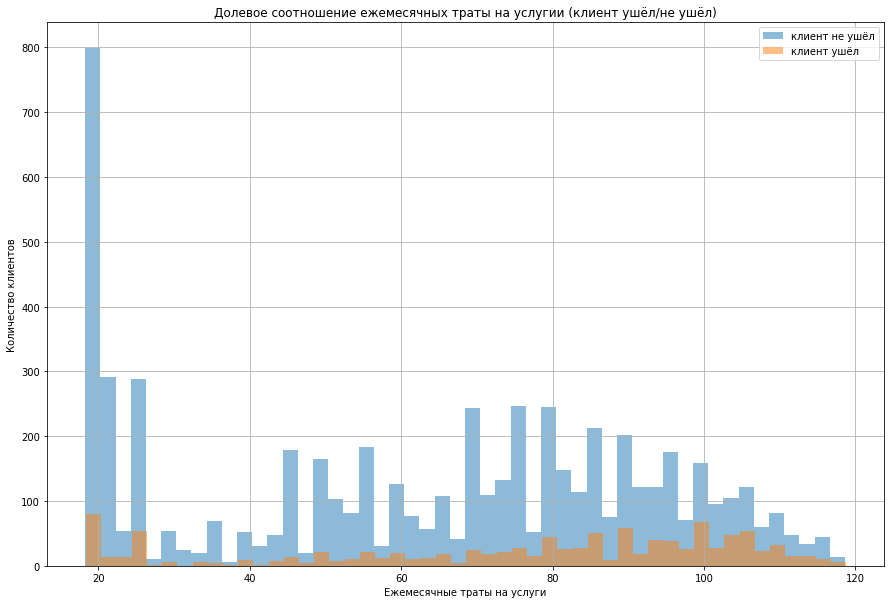

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
data[data['task'] == 0]['monthly-charges'].hist(bins=50, alpha=0.5, label='клиент не ушёл')
data[data['task'] == 1]['monthly-charges'].hist(bins=50, alpha=0.5, label='клиент ушёл')
plt.title('Долевое соотношение ежемесячных траты на услугии (клиент ушёл/не ушёл)')
plt.xlabel('Ежемесячные траты на услуги')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Заметная зависимость в районе 60 - 120 - чем больше ежемесечная трата на услуги, тем больше клиентов, которые ушли, с пиком в районе 100. Также заметен спад в районе 40 и небольшой пик в районе 20-25. Яркой зависимости оттока клиентов от ежемесячных трат на услуги не наблюдается

Заметен пик клиентов в районе 20, которые не ушли - скорей всего новые клиенты 

Изучение признака total-charges - всего потрачено денег на услуги

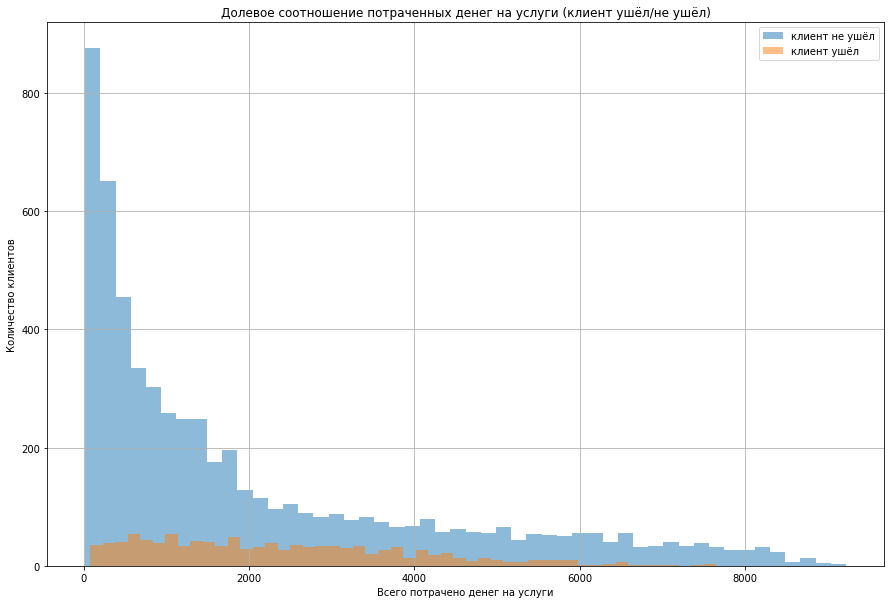

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
data[data['task'] == 0]['total-charges'].hist(bins=50, alpha=0.5, label='клиент не ушёл')
data[data['task'] == 1]['total-charges'].hist(bins=50, alpha=0.5, label='клиент ушёл')
plt.title('Долевое соотношение потраченных денег на услуги (клиент ушёл/не ушёл)')
plt.xlabel('Всего потрачено денег на услуги')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Новые клиенты - точно не уходят. Зависимость оттока клиентов от всей суммы потраченных денег на услуги не наблюдается. 

Изучение признака day-use - сколько дней клиент пользуется услугами

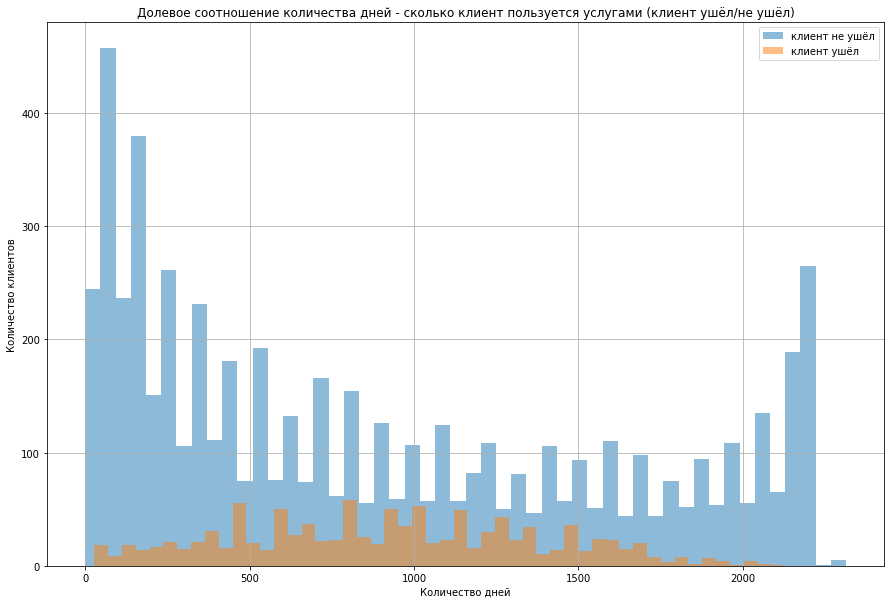

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
data[data['task'] == 0]['day-use'].hist(bins=50, alpha=0.5, label='клиент не ушёл')
data[data['task'] == 1]['day-use'].hist(bins=50, alpha=0.5, label='клиент ушёл')
plt.title('Долевое соотношение количества дней - сколько клиент пользуется услугами (клиент ушёл/не ушёл)')
plt.xlabel('Количество дней')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Количество ушедших клиентов имеет восходящий тренд относительно количества дней - сколько клиент пользуется услугами с пиком в 1000 дней, а затем постепенным спадом.

Количество оставшихся клиентов имеет нисходящий тренд относительно количества дней - сколько клиент пользуется услугами. Достаточно большое количество клиентов, которые остаются клиентами уже больше 2000 тысяч дней

### Обработка пропусков 

Изучим количество пропусков

In [35]:
data.isnull().sum().sort_values()

begin-date              0
task                    0
partner                 0
senior-citizen          0
gender                  0
total-charges           0
dependents              0
payment-method          0
paperless-billing       0
type                    0
end-date                0
monthly-charges         0
day-use                 0
multiple-lines        682
internet-service     1526
online-security      1526
online-backup        1526
device-protection    1526
tech-support         1526
streaming-tv         1526
streaming-movies     1526
dtype: int64

Так как большинство пропусков связаны с таблицей internet_new.csv - информация об интернет-услугах, то значит пропуски у клиентов, которые не пользуются интернет-услугами. Посмотрим на уникальные значения, чтобы определить, как заполнять пропуски

In [36]:
columns = [
    'internet-service',
    'online-security',
    'online-backup',
    'device-protection',
    'tech-support',
    'streaming-tv',
    'streaming-movies'
]

for column in columns:
    print(f"Уникальные значения в столбце '{column}':")
    print(data[column].value_counts())
    print()


Уникальные значения в столбце 'internet-service':
Fiber optic    3096
DSL            2421
Name: internet-service, dtype: int64

Уникальные значения в столбце 'online-security':
No     3498
Yes    2019
Name: online-security, dtype: int64

Уникальные значения в столбце 'online-backup':
No     3088
Yes    2429
Name: online-backup, dtype: int64

Уникальные значения в столбце 'device-protection':
No     3095
Yes    2422
Name: device-protection, dtype: int64

Уникальные значения в столбце 'tech-support':
No     3473
Yes    2044
Name: tech-support, dtype: int64

Уникальные значения в столбце 'streaming-tv':
No     2810
Yes    2707
Name: streaming-tv, dtype: int64

Уникальные значения в столбце 'streaming-movies':
No     2785
Yes    2732
Name: streaming-movies, dtype: int64



Так как для во многих столбцах используется 'No' для отрицания признака - клиентов, которые не используют интернет лучше отделить и пропуски заменить на 'NotUsedInternet', так в дальнейшем будет наглядней и понятней. 

In [37]:
for column in columns:
    data[column] = data[column].fillna('NotUsedInternet')

In [38]:
data.isnull().sum().sort_values()

begin-date             0
streaming-movies       0
streaming-tv           0
tech-support           0
device-protection      0
online-backup          0
online-security        0
internet-service       0
task                   0
dependents             0
senior-citizen         0
gender                 0
total-charges          0
monthly-charges        0
payment-method         0
paperless-billing      0
type                   0
end-date               0
partner                0
day-use                0
multiple-lines       682
dtype: int64

Посмотрим на уникальные значение в столбце multiple-lines

In [39]:
data['multiple-lines'].value_counts()

No     3390
Yes    2971
Name: multiple-lines, dtype: int64

Также исходя из изначальной информации, можно сделать вывод, что пропуски в multiple-lines характерны только для клиентов, которые не пользуются услугами телефонии. Лучшим решением будет заменить пропуски на 'NotUsedPhone', это позволит не перемешать клиентов и добиться наглядности.

In [40]:
data['multiple-lines'] = data['multiple-lines'].fillna('NotUsedPhone') 

In [41]:
print(data.isnull().sum().sort_values())

begin-date           0
multiple-lines       0
streaming-movies     0
streaming-tv         0
tech-support         0
device-protection    0
online-backup        0
online-security      0
internet-service     0
task                 0
dependents           0
senior-citizen       0
gender               0
total-charges        0
monthly-charges      0
payment-method       0
paperless-billing    0
type                 0
end-date             0
partner              0
day-use              0
dtype: int64


Пропуски заполнены теперь можем перейти к изучению категориальных признаков

Столбцы 'begin-date', 'end-date' врядли ещё понадобяться, но в будущем могут привести к утечке - удалим сейчас

In [42]:
data.drop(['begin-date', 'end-date'], axis=1, inplace=True)

### Изучение категориальных признаков

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless-billing  7043 non-null   object 
 2   payment-method     7043 non-null   object 
 3   monthly-charges    7043 non-null   float64
 4   total-charges      7043 non-null   float64
 5   gender             7043 non-null   object 
 6   senior-citizen     7043 non-null   object 
 7   partner            7043 non-null   object 
 8   dependents         7043 non-null   object 
 9   internet-service   7043 non-null   object 
 10  online-security    7043 non-null   object 
 11  online-backup      7043 non-null   object 
 12  device-protection  7043 non-null   object 
 13  tech-support       7043 non-null   object 
 14  streaming-tv       7043 non-null   object 
 15  streaming-movies   7043 non-null   object 
 16  multiple-lines

Построим график оттока по различным категориальным признакам

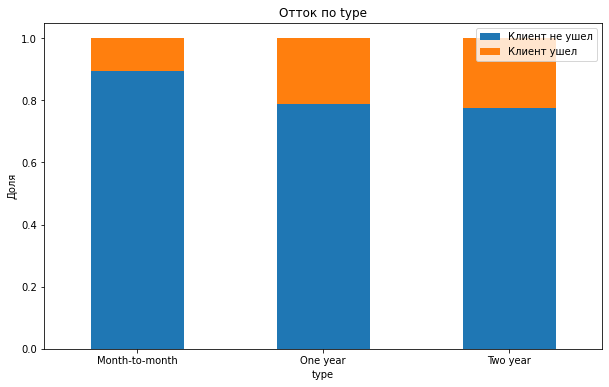

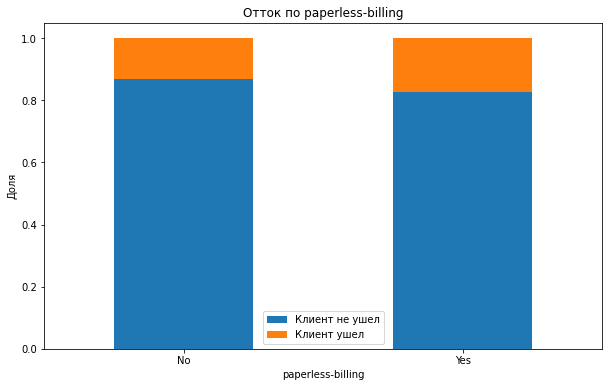

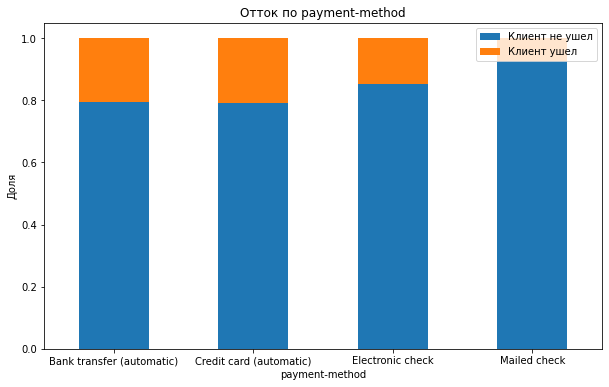

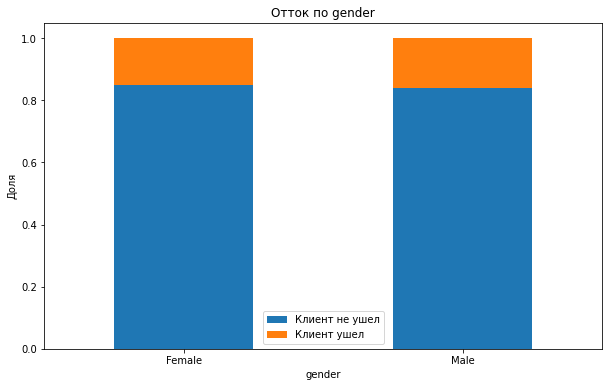

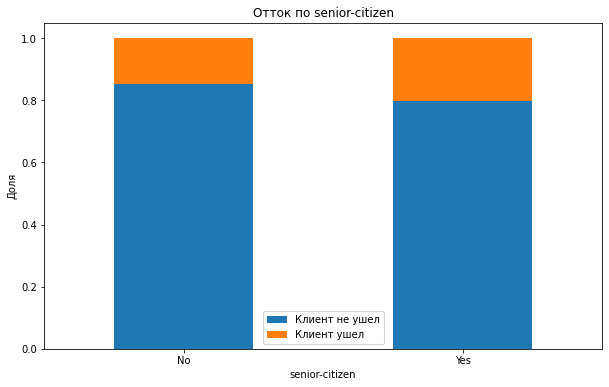

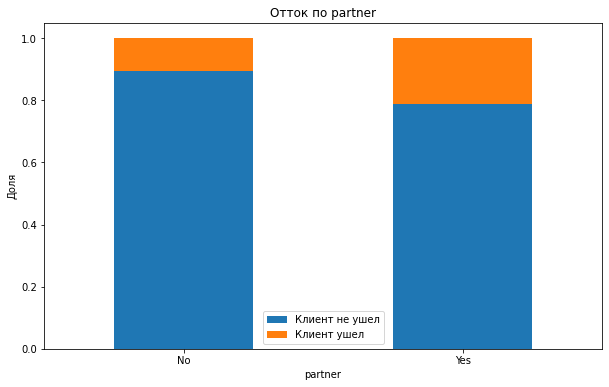

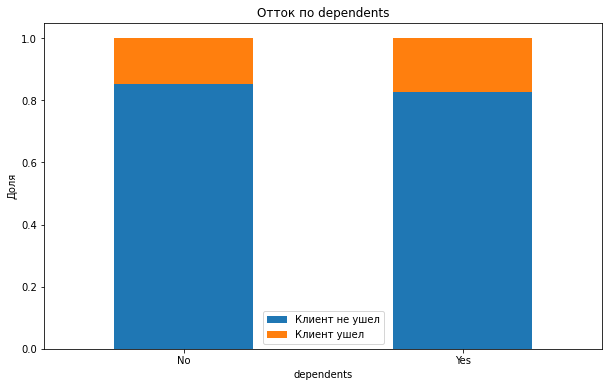

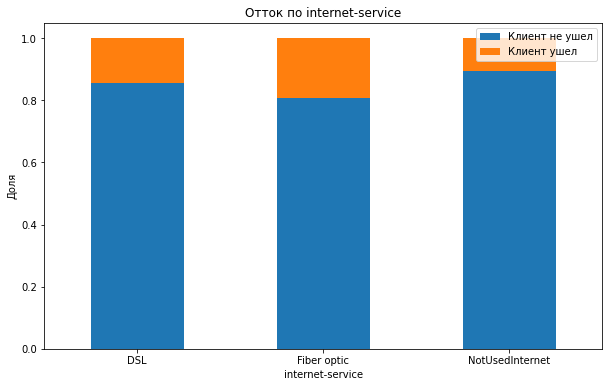

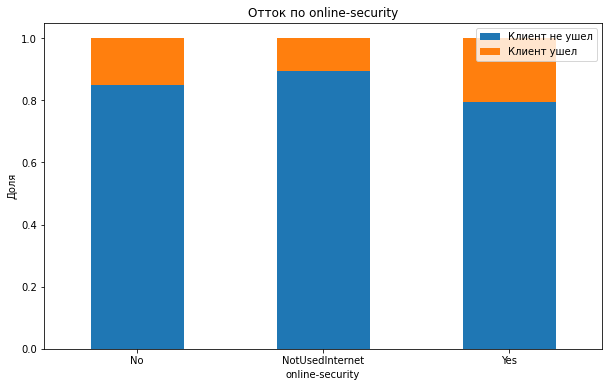

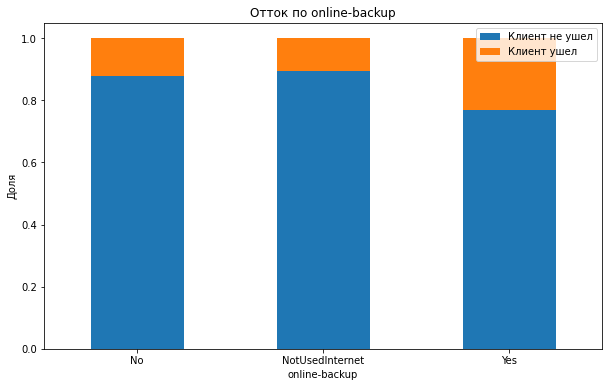

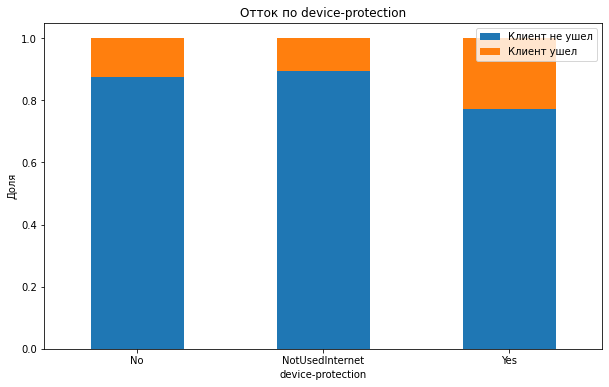

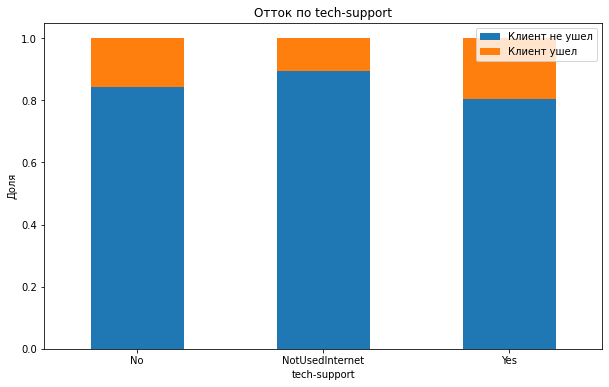

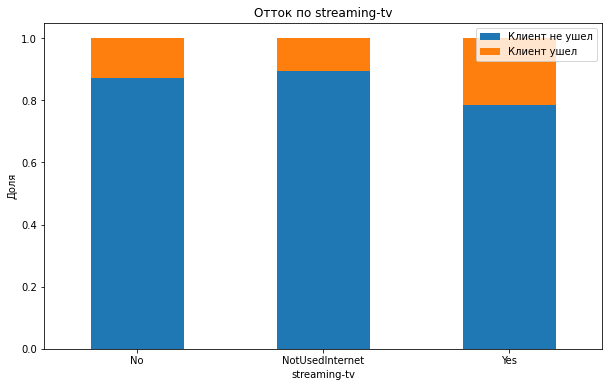

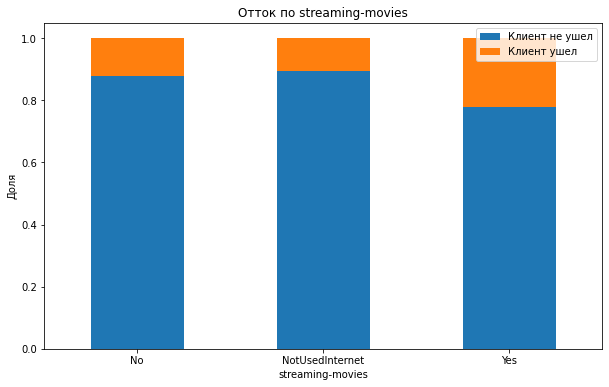

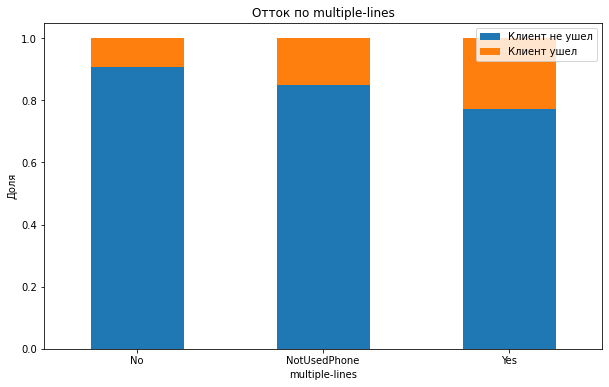

In [44]:
categorical_columns = [
    'type', 'paperless-billing', 'payment-method', 'gender', 'senior-citizen', 
    'partner', 'dependents', 'internet-service', 'online-security', 'online-backup',
    'device-protection', 'tech-support', 'streaming-tv', 'streaming-movies',
    'multiple-lines'
]

for column in categorical_columns:
    churn_rate = data.groupby([column, 'task'])['task'].count().unstack(fill_value=0)
    churn_rate = churn_rate.div(churn_rate.sum(axis=1), axis=0)
    churn_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Отток по {column}')
    plt.ylabel('Доля')
    plt.xticks(rotation=0)
    plt.legend(['Клиент не ушел', 'Клиент ушел'])
    plt.show()

Исходя из графиков получим следующее:
Для ушедших клиентов характерно:
1. Тип договора - 1 или 2 года - 20% к 10% у типа месяц к месяцу
2. Выставление счёта по электронной почте - Да, чуть меньше 20% к примерно 16% у не выставления
3. Способ облаты - Автоматический(банковский трансфер или кредитная карта) 20% к 15 у электронного чека и 5 у отправке по почте
4. Пол - ни мужской ни женский - характерности нет, по примерно 15% для каждого(слабая зависимость)
5. Наличие пенсионного статуса по возрасту  - Да, чуть меньше 20% к 15% у отсутствия статуса
6. Наличие супруга - Да, больше 20% к 10% у отсутствия супруга
7. Наличие иждивенцев - Да, чуть меньше 20% к 17% у отсутствия иждивенцев(слабая зависимость)
8. Наличие услуг Интернет - Fiber optic, больше 20% к 15% у DSL и 10% у неиспользующих интернет-услуги 
9. Наличие межсетевого экрана - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги 
10. Наличие облачное хранилище файлов для резервного копирования данных - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак) 
11. Наличие антивируса - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
12. Наличие выделенной линии технической поддержки - Да, около 20% к 15% у нет и 10% у неиспользующих интернет-услуги
13. Наличие онлайн-ТВ - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
14. Наличие онлайн-кинотеатра - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
15. Возможность подключения телефонного аппарата к нескольким линиям одновременно - Да, больше 20% к 10% у нет и 15% у неиспользующих телефонию(Заметно сильный признак)

На график были заметны слабые и сильные признаки:

- Слабые - gender и dependents

- Сильные - online-backup, device-protection, streaming-tv, streaming-movies, multiple-lines

Проверим свои выводы с помощью корреляции.

### Изучение корреляции признаков

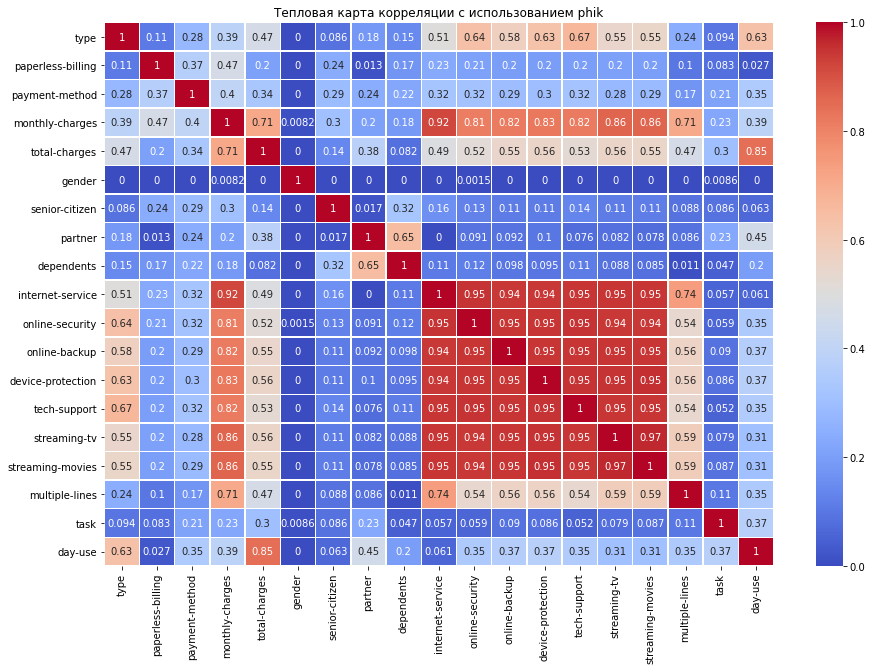

In [45]:
interval_columns = ['monthly-charges', 'total-charges', 'day-use']
plt.figure(figsize=(15, 10))
sns.heatmap(data.phik_matrix(interval_cols=interval_columns), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляции с использованием phik')
plt.show()

Исходя из карты корреляции удалим все признаки, для которых корреляция выше 0.8, оставив при этом, по одному мультиколлиниарному признаку с наибольшей корреляцией с целевым признаком. Также удалим столбец - gender у него минимальная корреляция.

In [46]:
columns_to_remove = [
    'internet-service',
    'online-security',
    'online-backup',
    'device-protection',
    'tech-support',
    'streaming-tv',
    'streaming-movies',
    'gender',
    'total-charges',
]

data.drop(columns=columns_to_remove, inplace=True)


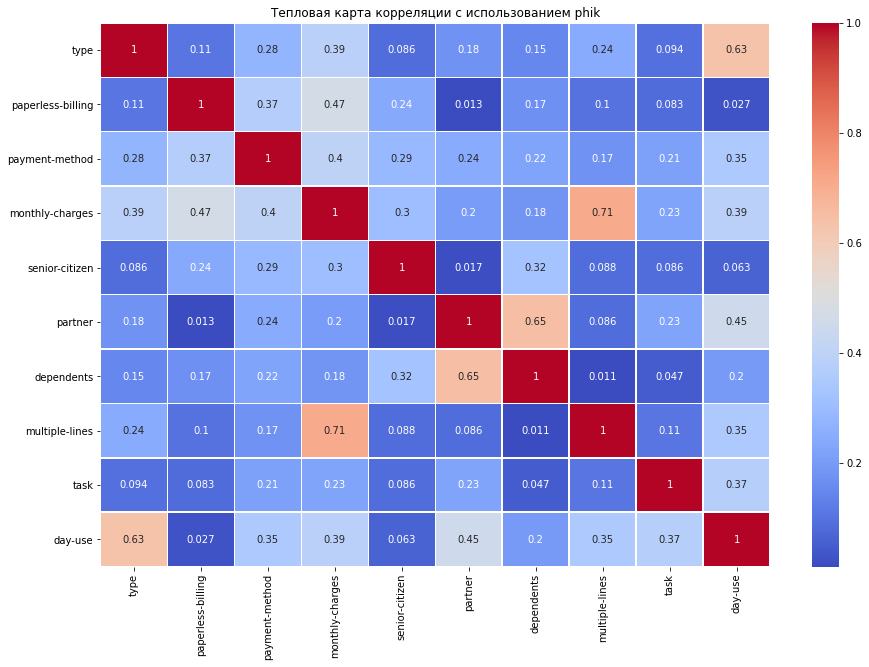

In [47]:
interval_columns = ['monthly-charges', 'day-use']
plt.figure(figsize=(15, 10))
sns.heatmap(data.phik_matrix(interval_cols=interval_columns), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляции с использованием phik')
plt.show()

Отбор признаков выполнен, мультиколлиниарность учтена.

### Промежуточные выводы

В промежуточном выводе составим итоговый портрет клиента, который "ушёл"

1. Ежемесячные траты на услуги:
- Около 60-120. Яркой зависимости нет.
2. Вся сумма, которую клиент потратил на улуги:
- Какого-то среднего значения нет. Уходят клиенты которые тратят и 20 и 8000
- Можно выделить то, что это точно не новый клиент.
3. Сколько дней клиент пользуется услугами:
- Около 500-1500 дней. Пик в районе 1000 дней
4. Тип договора - 1 или 2 года - 20% к 10% у типа месяц к месяцу
5. Выставление счёта по электронной почте - Да, чуть меньше 20% к примерно 16% у не выставления
6. Способ облаты - Автоматический(банковский трансфер или кредитная карта) 20% к 15 у электронного чека и 5 у отправке по почте
7. Пол - ни мужской ни женский - характерности нет, по примерно 15% для каждого(слабая зависимость)
8. Наличие пенсионного статуса по возрасту  - Да, чуть меньше 20% к 15% у отсутствия статуса
9. Наличие супруга - Да, больше 20% к 10% у отсутствия супруга
10. Наличие иждивенцев - Да, чуть меньше 20% к 17% у отсутствия иждивенцев(слабая зависимость)
11. Наличие услуг Интернет - Fiber optic, больше 20% к 15% у DSL и 10% у неиспользующих интернет-услуги 
12. Наличие межсетевого экрана - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги 
13. Наличие облачное хранилище файлов для резервного копирования данных - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак) 
14. Наличие антивируса - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
15. Наличие выделенной линии технической поддержки - Да, около 20% к 15% у нет и 10% у неиспользующих интернет-услуги
16. Наличие онлайн-ТВ - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
17. Наличие онлайн-кинотеатра - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
18. Возможность подключения телефонного аппарата к нескольким линиям одновременно - Да, больше 20% к 10% у нет и 15% у неиспользующих телефонию(Заметно сильный признак)

Также было выполнено:
1. Отбор признаков, были удалены все признаки, для которых корреляция выше 0.8, оставив при этом, по одному мультиколлиниарному признаку с наибольшей корреляцией с целевым признаком. Также удалим столбец - gender у него минимальная корреляция.
2. Обработка типов данных столбцов. Столбец total-charges привели к числовому типу, столбец senior-citizen для упрощения анализа данных изменили тип данных на object и заменили значения
3. Обработка пропусков

Теперь можем переходить к обучению модели

## Обучение модели

Так как данные уже подготовленны, обработаны пропуски, выбраны лучшие признаки на основе корреляции, учтена мультиколлиниарность, а также была предотвращена утечка данных, то можем сразу переходить к разделению выборок и разработке модели

### Разделение данных на выборки

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless-billing  7043 non-null   object 
 2   payment-method     7043 non-null   object 
 3   monthly-charges    7043 non-null   float64
 4   senior-citizen     7043 non-null   object 
 5   partner            7043 non-null   object 
 6   dependents         7043 non-null   object 
 7   multiple-lines     7043 non-null   object 
 8   task               7043 non-null   int64  
 9   day-use            7043 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 605.3+ KB


Выборки разделим по заданию - 3 к 1. Стратификация относительно таргета.

In [49]:
features = data.drop('task', axis=1)
target = data['task']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM_STATE, 
                                                                            stratify=target)

In [50]:
print("Обучаяющая выборка:", features_train.shape)
print("Тестовая выборка:", features_test.shape)

Обучаяющая выборка: (5282, 9)
Тестовая выборка: (1761, 9)


Выборки сформированны верно, можем переходить к кодированию и масштабированию

### Кодирование и масштабирование данных

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless-billing  7043 non-null   object 
 2   payment-method     7043 non-null   object 
 3   monthly-charges    7043 non-null   float64
 4   senior-citizen     7043 non-null   object 
 5   partner            7043 non-null   object 
 6   dependents         7043 non-null   object 
 7   multiple-lines     7043 non-null   object 
 8   task               7043 non-null   int64  
 9   day-use            7043 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 863.3+ KB


Разделим категориальные и численные признаки

In [52]:
categorical_features = ['type', 'paperless-billing', 'payment-method', 'senior-citizen',
                        'partner', 'dependents', 'multiple-lines']
numeric_features = ['monthly-charges', 'day-use']

Создадим два трансформера данных(также поможет избежать утечки данных). Один для деревянных моделей, другой для логистической регрессии. Внутри которого будет описано: масштабирование для логистической регрессии, приведение распределения к нормальному для деревянных моделей, кодирование OE - для деревянных моделей, OHE - для логистической регрессии. Для модели бустинга будем использовать трансформер данных для деревянных моделей.

In [53]:
tree_based_transformer = make_column_transformer(
    (OrdinalEncoder(), categorical_features),  
    (PowerTransformer(), numeric_features),        
)

linear_model_transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),  
    (StandardScaler(), numeric_features),                
)

Можем переходить к обучению моделей

### Обучение моделей

#### Случайный лес

Опишем предпроцессор и модель, а также различные гипперпараметры

In [54]:
tree_pipeline = Pipeline([
    ('preprocessor', tree_based_transformer),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])

tree_param_grid = {
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': range(10, 100, 10),  
    'model__n_estimators': [50, 60, 80, 100, 200]
}

Обучение модели

In [55]:
%%time
tree_grid_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
tree_grid_search.fit(features_train, target_train)
print("Лучшие параметры случайного леса:", tree_grid_search.best_estimator_)
print("Лучшее значение ROC-AUC на кросс-валидации:", tree_grid_search.best_score_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Лучшие параметры случайного леса: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['type', 'paperless-billing',
                                                   'payment-method',
                                                   'senior-citizen', 'partner',
                                                   'dependents',
                                                   'multiple-lines']),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  ['monthly-charges',
                                                   'day-use'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_

#### Логистическая регрессия

Опишем предпроцессор и модель, а также различные гипперпараметры

In [56]:
logistic_regression_pipeline = Pipeline([
    ('preprocessor', linear_model_transformer),
    ('model', LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', penalty='l2'))
])
logistic_regression_param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

Обучение модели

In [57]:
%%time
logistic_regression_grid_search = GridSearchCV(logistic_regression_pipeline, logistic_regression_param_grid, 
                                               cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
logistic_regression_grid_search.fit(features_train, target_train)
print("Лучшие параметры логистической регрессии:", logistic_regression_grid_search.best_estimator_)
print("Лучшее значение ROC-AUC на кросс-валидации:", logistic_regression_grid_search.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Лучшие параметры логистической регрессии: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['type', 'paperless-billing',
                                                   'payment-method',
                                                   'senior-citizen', 'partner',
                                                   'dependents',
                                                   'multiple-lines']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['monthly-charges',
                                                   'day-use'])])),
                ('model', LogisticRegression(C=0.1, random_state=11092023))])
Лучшее значение

#### Градиентный бустинг

Опишем предпроцессор и модель, а также различные гипперпараметры

In [58]:
gb_classifier_pipeline = Pipeline([
    ('preprocessor', tree_based_transformer),
    ('model', GradientBoostingClassifier(random_state=RANDOM_STATE))
])
gb_classifier_param_grid = {
    'model__n_estimators': [200, 400, 500, 600],
    'model__learning_rate': [0.2, 0.3, 0.4],
    'model__max_depth': [1, 2 ,3]
}

Обучение модели

In [59]:
%%time
gb_classifier_grid_search = GridSearchCV(gb_classifier_pipeline, gb_classifier_param_grid,
                                         cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
gb_classifier_grid_search.fit(features_train, target_train)
print("Лучшие параметры градиентного бустинга:", gb_classifier_grid_search.best_estimator_)
print("Значение ROC-AUC на кросс-валидации:", gb_classifier_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры градиентного бустинга: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['type', 'paperless-billing',
                                                   'payment-method',
                                                   'senior-citizen', 'partner',
                                                   'dependents',
                                                   'multiple-lines']),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  ['monthly-charges',
                                                   'day-use'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.3

### Выбор лучшей модели

Исходя из обучения моделей получим следующее:
1. Случайный лес
- Лучшие параметры случайного леса: max_depth=10, min_samples_split=30
- Лучшее значение ROC-AUC на кросс-валидации: 0.8308744006430165
2. Логистическая регрессия
- Лучшие параметры логистической регрессии: solver='lbfgs', penalty='l2', C=0.1
- Лучшее значение ROC-AUC на кросс-валидации: 0.746432089087363 
3. Градиентный бустинг
- Лучшие параметры градиентного бустинга: learning_rate=0.3, max_depth=2, n_estimators=400
- Лучшее значение ROC-AUC на кросс-валидации: 0.9268740860258555


Лучшей моделью оказался Градиентный бустинг с параметрами: learning_rate=0.3, max_depth=2, n_estimators=400

И значением ROC-AUC на кросс-валидации: 0.9268740860258555


Сохраним лучшую модель

In [60]:
best_gb_classifier_model = gb_classifier_grid_search.best_estimator_

### Промежуточный вывод

В ходе 3 шага было выполнено:
1. Данные были разделены на выборки с соотношением 3 к 1
2. Были созданы трансформеры данных. Один для деревянных моделей, другой для логистической регрессии, внутри которого были описаны: масштабирование для логистической регрессии, приведение распределения к нормальному для деревянных моделей, кодирование OE - для деревянных моделей, OHE - для логистической регрессии. Для модели бустинга использовался трансформер данных для деревянных моделей.
3. Было проведено обучение моделей, получились следующий результаты:
    1. Случайный лес
    - Лучшие параметры случайного леса: max_depth=10, min_samples_split=30
    - Лучшее значение ROC-AUC на кросс-валидации: 0.8308744006430165
    2. Логистическая регрессия
    - Лучшие параметры логистической регрессии: solver='lbfgs', penalty='l2', C=0.1
    - Лучшее значение ROC-AUC на кросс-валидации: 0.746432089087363 
    3. Градиентный бустинг
    - Лучшие параметры градиентного бустинга: learning_rate=0.3, max_depth=2, n_estimators=400
    - Лучшее значение ROC-AUC на кросс-валидации: 0.9268740860258555

4. Лучшей моделью оказался Градиентный бустинг с параметрами: learning_rate=0.3, max_depth=2, n_estimators=400

    И значением ROC-AUC на кросс-валидации: 0.9268740860258555
    
  

Перейдём к тестированию модели

## Тестирование модели

### Проверка лучшей модели на тестовых данных

Проверим сохранённую лучшую модель градиетного бустинга на тестовых данных

In [61]:
gb_classifier_probs = best_gb_classifier_model.predict_proba(features_test)[:, 1] 
gb_classifier_preds = best_gb_classifier_model.predict(features_test)

gb_classifier_roc_auc = roc_auc_score(target_test, gb_classifier_probs)
gb_classifier_accuracy = accuracy_score(target_test, gb_classifier_preds)

print("ROC-AUC на тестовых данных:", gb_classifier_roc_auc)
print("Accuracy на тестовых данных:", gb_classifier_accuracy)

ROC-AUC на тестовых данных: 0.9399216933806435
Accuracy на тестовых данных: 0.9432140829074389


Модель успешно прошла тестирование, со значениями:
- ROC-AUC на тестовых данных: 0.9399216933806435
- Accuracy на тестовых данных: 0.9432140829074389

Метрика Accuracy со значением 0.9432140829074389 говорит о том, что модель c шансом в 94% определит как клиента, который уйдёт, так и наоборот клиента, который не уйдёт

### Построение графика ROC, матрицы ошибок

Построим график ROC-кривой

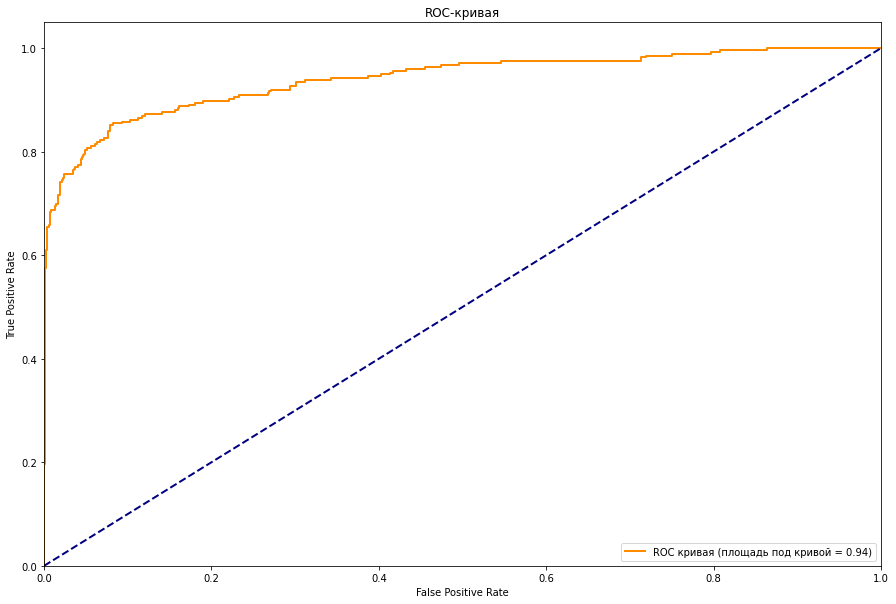

In [62]:
fpr, tpr, _ = roc_curve(target_test, gb_classifier_probs)

plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (площадь под кривой = {gb_classifier_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Исходя из графика видно:
1. Модель сильно лучше, чем случайная модель(пунктирная линия)
2. Модель имеет как высокую чувствительность(trp), так и высокую специфичность(fpr), что говорит о том, что у модель мало ошибается - редко будет предсказывать, что клиент ушёл, хотя он остался, так и наоборот, что модель часто будет верно указывать на клиента, который уйдёт.

Подтвердим выводы из графика roc-кривой с помощью матрицы ошибок

Построим матрицу ошибок

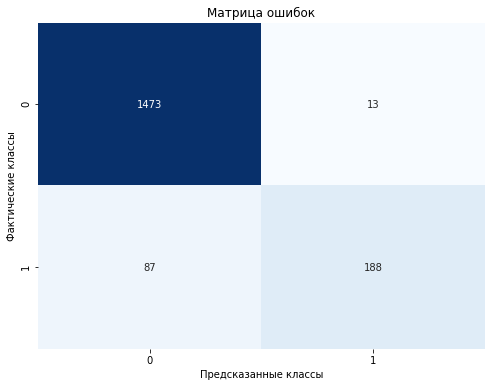

In [63]:
conf_matrix = confusion_matrix(target_test, gb_classifier_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Предсказанные классы')
plt.ylabel('Фактические классы')
plt.title('Матрица ошибок')
plt.show()

Исходя из матрицы ошибок можно сделать следующие выводы:

1. Истинно положительных результатов(клиент ушёл) - модель предсказала верно 188 раз , ложно отрицательных(клиент остался, но модель посчитала, что ушёл)  - 87 раз
2. Истино отрицательных результатов(клиент остался) - модель предсказала верно 1473 раза, ложно положительных(клиент ушёл, но модель посчитала, что остался) - 13 раза

Из этого можно сделать вывод:

- Модель хорошо решит проблему бизнеса "пользователю предложили промокоды, но он не собирался уходить (False Positive)", ведь модель ошиблась 13 к 1473 верным.

- Чуть хуже модель решит пролбему бизнеса "пользователю ничего не предложили и он ушёл (False Negative)", ведь модель ошиблась 87 раз к 188 верным.

Предложение по использованию модели заказчику:

- На этапе опытной эксплуатации рекомендуется совместно с маркетологами подобрать порог классификации так, чтобы оптимизировать метрики бизнеса в денежном выражении с учетом бюджета на акции по удержанию клиентов и разной цены ошибок первого и второго рода.

### Определение важности признаков

Определим важность признаков

                             Feature  Importance
8          powertransformer__day-use    0.745199
7  powertransformer__monthly-charges    0.124953
0               ordinalencoder__type    0.056634
6     ordinalencoder__multiple-lines    0.029401
2     ordinalencoder__payment-method    0.019595
4            ordinalencoder__partner    0.018689
3     ordinalencoder__senior-citizen    0.004026
5         ordinalencoder__dependents    0.000976
1  ordinalencoder__paperless-billing    0.000528


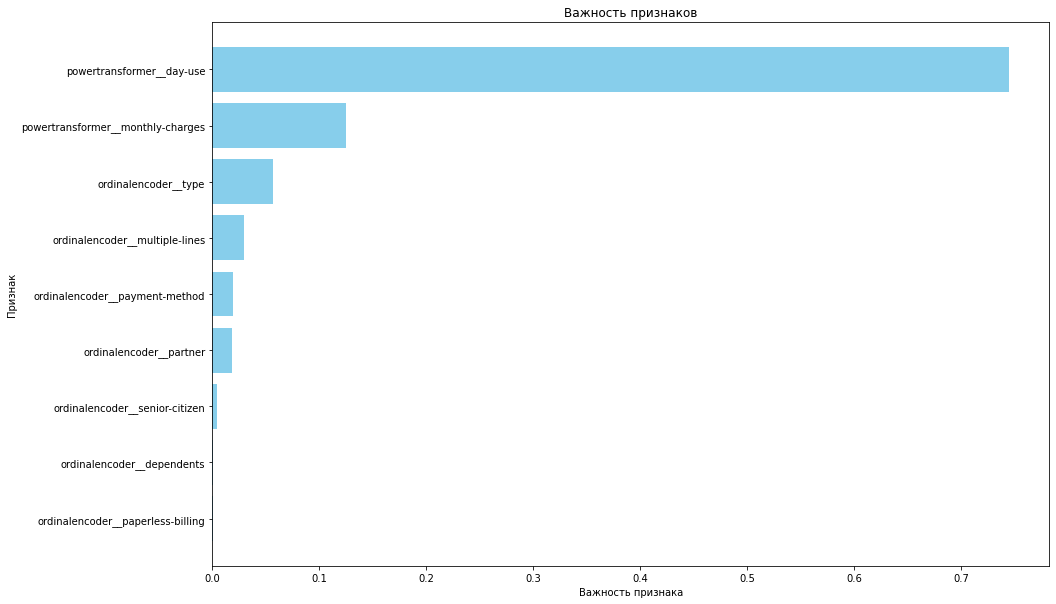

In [64]:
feature_importances = best_gb_classifier_model.named_steps['model'].feature_importances_

feature_names = best_gb_classifier_model[:-1].get_feature_names_out()

importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)

print(importance_data)

plt.figure(figsize=(15, 10))
plt.barh(importance_data['Feature'], importance_data['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

Выводы на основе таблицы важности признаков:
1. Наибольшая важность у признака day-use - 0.745199, что говорит о сильном влиянии длительности договора на определение ухода/не ухода клиента
2. Также важными модно считать признаки monthly-charges(ежемесячные траты на услуги) - 0.124953 и type(тип договора: ежемесячный, годовой и т.д) - 0.056634
3. Оставшиеся признаки multiple-lines, payment-method, partner, senior-citizen, dependents, paperless-billing  - почти не важные признаки с показателем влияния меньше 0.03

### Промежуточный вывод

В ходе тестирования были выполненны следующий шаги, со следующими выводами:
1. Проверка лучшей модели на тестовых данных:

    1) Модель успешно прошла тестирование, со значениями:
    - ROC-AUC на тестовых данных: 0.9399216933806435
    - Accuracy на тестовых данных: 0.9432140829074389
    
    2) Метрика Accuracy со значением 0.9432140829074389 говорит о том, что модель c шансом в 94% определит как клиента, который уйдёт, так и наоборот клиента, который не уйдёт
    
2. Построение графика ROC, матрицы ошибок:

    1) Исходя из графика видно:
    1. Модель сильно лучше, чем случайная модель(пунктирная линия)
    2. Модель имеет как высокую чувствительность(trp), так и высокую специфичность(fpr), что говорит о том, что у модель мало ошибается - редко будет предсказывать, что клиент ушёл, хотя он остался, так и наоборот, что модель часто будет верно указывать на клиента, который уйдёт.
    
        2)Исходя из матрицы ошибок можно сделать следующие выводы:

    1. Истинно положительных результатов(клиент ушёл) - модель предсказала верно 188 раз , ложно отрицательных(клиент остался, но модель посчитала, что ушёл)  - 87 раз
    2. Истино отрицательных результатов(клиент остался) - модель предсказала верно 1473 раза, ложно положительных(клиент ушёл, но модель посчитала, что остался) - 13 раза

    Из этого можно сделать вывод:

    - Модель хорошо решит проблему бизнеса "пользователю предложили промокоды, но он не собирался уходить (False Positive)", ведь модель ошиблась 13 к 1473 верным.

    - Чуть хуже модель решит пролбему бизнеса "пользователю ничего не предложили и он ушёл (False Negative)", ведь модель ошиблась 87 раз к 188 верным.

    Предложение по использованию модели заказчику:

    - На этапе опытной эксплуатации рекомендуется совместно с маркетологами подобрать порог классификации так, чтобы оптимизировать метрики бизнеса в денежном выражении с учетом бюджета на акции по удержанию клиентов и разной цены ошибок первого и второго рода.

3.  Определение важности признаков:

    Выводы на основе таблицы важности признаков:

    1. Наибольшая важность у признака day-use - 0.745199, что говорит о сильном влиянии длительности договора на определение ухода/не ухода клиента
    2. Также важными модно считать признаки monthly-charges(ежемесячные траты на услуги) - 0.124953 и type(тип договора: ежемесячный, годовой и т.д) - 0.056634
    3. Оставшиеся признаки multiple-lines, payment-method, partner, senior-citizen, dependents, paperless-billing  - почти не важные признаки с показателем влияния меньше 0.03

## Вывод

В ходе итогового проекта была создана модель, которая на основе данных о клиенте - предсказывает его уход/не уход. Удалось достичь ROC-AUC меры в 0.9380227578612506 на тестовых данных.

Проект выполнялся по плану, на каждом этапе были сделаны следующие выводы:

1. Предобработка данных

    1. Последовательность столбцов логична
    2. Явных дубликатов - нет
    3. Были стандатизированны названия столбцов
    4. На первый взгляд данные выглядят неплохо - пропуски в большинстве связанны с отсутствием у клиентов подключения к услугам интернета или услугам телефонии
    5. Был изменён тип данных у столбцов begin-date и end-date на datetime64, остальные столбцы требуют более подробного изучения
    6. Был добавлен целевой признак 'task' - бинарный признак, где значение 1 - клиент ушёл, 0 - клиент не ушёл
    7. Был добавлен синтетический признак 'day-use' - сколько дней клиент пользуется услугами
    8. Для избежания утечки данных - после анализа данных и перед разделением данных на выборки потребуется удалить столбцы 'begin-date' и 'end-date'

2. Анализ данных

        Итоговый портрет клиента, который "ушёл"

    1. Ежемесячные траты на услуги:
    - Около 60-120. Яркой зависимости нет.
    2. Вся сумма, которую клиент потратил на улуги:
    - Какого-то среднего значения нет. Уходят клиенты которые тратят и 20 и 8000
    - Можно выделить то, что это точно не новый клиент.
    3. Сколько дней клиент пользуется услугами:
    - Около 500-1500 дней. Пик в районе 1000 дней
    4. Тип договора - 1 или 2 года - 20% к 10% у типа месяц к месяцу
    5. Выставление счёта по электронной почте - Да, чуть меньше 20% к примерно 16% у не выставления
    6. Способ облаты - Автоматический(банковский трансфер или кредитная карта) 20% к 15 у электронного чека и 5 у отправке по почте
    7. Пол - ни мужской ни женский - характерности нет, по примерно 15% для каждого(слабая зависимость)
    8. Наличие пенсионного статуса по возрасту  - Да, чуть меньше 20% к 15% у отсутствия статуса
    9. Наличие супруга - Да, больше 20% к 10% у отсутствия супруга
    10. Наличие иждивенцев - Да, чуть меньше 20% к 17% у отсутствия иждивенцев(слабая зависимость)
    11. Наличие услуг Интернет - Fiber optic, больше 20% к 15% у DSL и 10% у неиспользующих интернет-услуги 
    12. Наличие межсетевого экрана - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги 
    13. Наличие облачное хранилище файлов для резервного копирования данных - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак) 
    14. Наличие антивируса - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
    15. Наличие выделенной линии технической поддержки - Да, около 20% к 15% у нет и 10% у неиспользующих интернет-услуги
    16. Наличие онлайн-ТВ - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
    17. Наличие онлайн-кинотеатра - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
    18. Возможность подключения телефонного аппарата к нескольким линиям одновременно - Да, больше 20% к 10% у нет и 15% у неиспользующих телефонию(Заметно сильный признак)
    
        Также было выполнено:
    1. Отбор признаков, были удалены все признаки, для которых корреляция выше 0.8, оставив при этом, по одному мультиколлиниарному признаку с наибольшей корреляцией с целевым признаком. Также удалим столбец - gender у него минимальная корреляция.
    2. Обработка типов данных столбцов. Столбец total-charges привели к числовому типу, столбец senior-citizen для упрощения анализа данных изменили тип данных на object и заменили значения
    3. Обработка пропусков
    
3. Обучение модели

            В ходе 3 шага было выполнено:
    1. Данные были разделены на выборки с соотношением 3 к 1
    2. Были созданы трансформеры данных. Один для деревянных моделей, другой для логистической регрессии, внутри которого были описаны: масштабирование для логистической регрессии, приведение распределения к нормальному для деревянных моделей, кодирование OE - для деревянных моделей, OHE - для логистической регрессии. Для модели бустинга использовался трансформер данных для деревянных моделей.
    3. Было проведено обучение моделей, получились следующий результаты:
        1. Случайный лес
        - Лучшие параметры случайного леса: max_depth=10, min_samples_split=30
        - Лучшее значение ROC-AUC на кросс-валидации: 0.8308744006430165
        2. Логистическая регрессия
        - Лучшие параметры логистической регрессии: solver='lbfgs', penalty='l2', C=0.1
        - Лучшее значение ROC-AUC на кросс-валидации: 0.746432089087363 
        3. Градиентный бустинг
        - Лучшие параметры градиентного бустинга: learning_rate=0.3, max_depth=2, n_estimators=400
        - Лучшее значение ROC-AUC на кросс-валидации: 0.9268740860258555

    4. Лучшей моделью оказался Градиентный бустинг с параметрами: learning_rate=0.3, max_depth=2, n_estimators=400

        И значением ROC-AUC на кросс-валидации: 0.9268740860258555

        
4. Тестирование модели

            В ходе тестирования были выполненны следующий шаги, со следующими выводами:
    1. Проверка лучшей модели на тестовых данных:

        1) Модель успешно прошла тестирование, со значениями:
        - ROC-AUC на тестовых данных: 0.9399216933806435
        - Accuracy на тестовых данных: 0.9432140829074389

        2) Метрика Accuracy со значением 0.9432140829074389 говорит о том, что модель c шансом в 94% определит как клиента, который уйдёт, так и наоборот клиента, который не уйдёт

    2. Построение графика ROC, матрицы ошибок:

        1) Исходя из графика видно:
        1. Модель сильно лучше, чем случайная модель(пунктирная линия)
        2. Модель имеет как высокую чувствительность(trp), так и высокую специфичность(fpr), что говорит о том, что у модель мало ошибается - редко будет предсказывать, что клиент ушёл, хотя он остался, так и наоборот, что модель часто будет верно указывать на клиента, который уйдёт.

            2)Исходя из матрицы ошибок можно сделать следующие выводы:

        1. Истинно положительных результатов(клиент ушёл) - модель предсказала верно 188 раз , ложно отрицательных(клиент остался, но модель посчитала, что ушёл)  - 87 раз
        2. Истино отрицательных результатов(клиент остался) - модель предсказала верно 1473 раза, ложно положительных(клиент ушёл, но модель посчитала, что остался) - 13 раза

        Из этого можно сделать вывод:

        - Модель хорошо решит проблему бизнеса "пользователю предложили промокоды, но он не собирался уходить (False Positive)", ведь модель ошиблась 13 к 1473 верным.

        - Чуть хуже модель решит пролбему бизнеса "пользователю ничего не предложили и он ушёл (False Negative)", ведь модель ошиблась 87 раз к 188 верным.

        Предложение по использованию модели заказчику:

        - На этапе опытной эксплуатации рекомендуется совместно с маркетологами подобрать порог классификации так, чтобы оптимизировать метрики бизнеса в денежном выражении с учетом бюджета на акции по удержанию клиентов и разной цены ошибок первого и второго рода.

    3.  Определение важности признаков:

        Выводы на основе таблицы важности признаков:

        1. Наибольшая важность у признака day-use - 0.745199, что говорит о сильном влиянии длительности договора на определение ухода/не ухода клиента
        2. Также важными модно считать признаки monthly-charges(ежемесячные траты на услуги) - 0.124953 и type(тип договора: ежемесячный, годовой и т.д) - 0.056634
        3. Оставшиеся признаки multiple-lines, payment-method, partner, senior-citizen, dependents, paperless-billing  - почти не важные признаки с показателем влияния меньше 0.03

## Отчёт по решению

В ходе итогового проекта была создана модель, которая на основе данных о клиенте - предсказывает его уход/не уход. Удалось достичь ROC-AUC меры в 0.9380227578612506 на тестовых данных.

 **Какие пункты плана были выполнены, а какие — нет. Почему?**

Итоговое решение не отличается от плана. Все шаги были выполнены.

**Какие трудности возникли и как вы их преодолели?** 

При решении задачи особых трудностей не возникало. Иногда приходилось использовать документацию, интересные статьи для построения красивых графиков и матриц, а также для правильной интерпритаций ROC-кривой и матрицы ошибок.

**Какие ключевые шаги в решении задачи вы выделили?**

В ходе решения задачи были выполнены следующие ключевые шаги:

1. Предобработка данных

    1) Загрузка данных и педобработка данных - данные были загружены и первично осмотрены, были сформулированны следующие выводы:
        -  Последовательность столбцов логична
        - Явных дубликатов - нет
        - Были стандатизированны названия столбцов
        - На первый взгляд данные выглядят неплохо - пропуски в большинстве связанны с отсутствием у клиентов подключения к услугам интернета или услугам телефонии
        - Был изменён тип данных у столбцов begin-date и end-date на datetime64
        
    2) Создание целевого признака:
        - Был добавлен целевой признак 'task' - бинарный признак, где значение 1 - клиент ушёл, 0 - клиент не ушёл 
        
    3) Создание синтетических признаков:
        - Был добавлен синтетический признак 'day-use' - сколько дней клиент пользуется услугами
        
Также было решено, что для избежания утечки данных - после анализа данных и перед разделением данных на выборки потребуется удалить столбцы 'begin-date' и 'end-date' 

2. Анализ данных

    1) Обработка типов данных столбцов:
        - Столбец total-charges привели к числовому типу, столбец senior-citizen для упрощения анализа данных изменили тип данных на object и заменили значения
        
    2) Обработка пропусков:
         - Пропуски в total-charges заменили на значение в monthly-charges 
         - Пропуски связанные с тем, что клиент не пользовался интернет-услугами заполнили - 'NotUsedInternet' 
         - Пропуски связанные с тем, что клиент не пользовался услугами телефонии заполнили - 'NotUsedPhone'
         
    3) Изучение категориальных  и числовых признаков позволило создать портрет клиента, который ушёл:
         1. Ежемесячные траты на услуги:
        - Около 60-120. Яркой зависимости нет.
        2. Вся сумма, которую клиент потратил на улуги:
        - Какого-то среднего значения нет. Уходят клиенты которые тратят и 20 и 8000
        - Можно выделить то, что это точно не новый клиент.
        3. Сколько дней клиент пользуется услугами:
        - Около 500-1500 дней. Пик в районе 1000 дней
        4. Тип договора - 1 или 2 года - 20% к 10% у типа месяц к месяцу
        5. Выставление счёта по электронной почте - Да, чуть меньше 20% к примерно 16% у не выставления
        6. Способ облаты - Автоматический(банковский трансфер или кредитная карта) 20% к 15 у электронного чека и 5 у отправке по почте
        7. Пол - ни мужской ни женский - характерности нет, по примерно 15% для каждого(слабая зависимость)
        8. Наличие пенсионного статуса по возрасту  - Да, чуть меньше 20% к 15% у отсутствия статуса
        9. Наличие супруга - Да, больше 20% к 10% у отсутствия супруга
        10. Наличие иждивенцев - Да, чуть меньше 20% к 17% у отсутствия иждивенцев(слабая зависимость)
        11. Наличие услуг Интернет - Fiber optic, больше 20% к 15% у DSL и 10% у неиспользующих интернет-услуги 
        12. Наличие межсетевого экрана - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги 
        13. Наличие облачное хранилище файлов для резервного копирования данных - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак) 
        14. Наличие антивируса - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
        15. Наличие выделенной линии технической поддержки - Да, около 20% к 15% у нет и 10% у неиспользующих интернет-услуги
        16. Наличие онлайн-ТВ - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
        17. Наличие онлайн-кинотеатра - Да, больше 20% к 15% у нет и 10% у неиспользующих интернет-услуги(Заметно сильный признак)
        18. Возможность подключения телефонного аппарата к нескольким линиям одновременно - Да, больше 20% к 10% у нет и 15% у неиспользующих телефонию(Заметно сильный признак)
    4) Изучение корреляции признаков:
         - Были удалены все признаки, для которых корреляция выше 0.8, оставив при этом, по одному мультиколлиниарному признаку с наибольшей корреляцией с целевым признаком. Также удалим столбец - gender у него минимальная корреляция.
         
3. Обучение модели

    1) Разделение данных на выборки:
        - Данные были разделены на выборки с соотношением 3 к 1 
        
    2) Кодирование и масштабирование данных
        - Были созданы трансформеры данных. Один для деревянных моделей, другой для логистической регрессии, внутри которого были описаны: масштабирование для логистической регрессии, приведение распределения к нормальному для деревянных моделей, кодирование OE - для деревянных моделей, OHE - для логистической регрессии. Для модели бустинга использовался трансформер данных для деревянных моделей.
        
    3) Обучение различных моделей с различными гипперпараметрами:
        1. Случайный лес
        - Лучшие параметры случайного леса: max_depth=10, min_samples_split=30
        - Лучшее значение ROC-AUC на кросс-валидации: 0.8308744006430165
        2. Логистическая регрессия
        - Лучшие параметры логистической регрессии: solver='lbfgs', penalty='l2', C=0.1
        - Лучшее значение ROC-AUC на кросс-валидации: 0.746432089087363 
        3. Градиентный бустинг
        - Лучшие параметры градиентного бустинга: learning_rate=0.3, max_depth=2, n_estimators=400
        - Лучшее значение ROC-AUC на кросс-валидации: 0.9268740860258555

    4) Выбор лучшей модели:
         - Лучшей моделью оказался Градиентный бустинг с параметрами: learning_rate=0.3, max_depth=2, n_estimators=400
            И значением ROC-AUC на кросс-валидации: 0.9268740860258555

4. Тестирование модели

    1) Проверка лучшей модели на тестовых данных:

        - Модель успешно прошла тестирование, со значениями:
            - ROC-AUC на тестовых данных: 0.9399216933806435
            - Accuracy на тестовых данных: 0.9432140829074389

        - Метрика Accuracy со значением 0.9432140829074389 говорит о том, что модель c шансом в 94% определит как клиента, который уйдёт, так и наоборот клиента, который не уйдёт

    2) Построение графика ROC, матрицы ошибок:

        - Исходя из графика видно:
            1. Модель сильно лучше, чем случайная модель(пунктирная линия)
            2. Модель имеет как высокую чувствительность(trp), так и высокую специфичность(fpr), что говорит о том, что у модель мало ошибается - редко будет предсказывать, что клиент ушёл, хотя он остался, так и наоборот, что модель часто будет верно указывать на клиента, который уйдёт.

            -Исходя из матрицы ошибок можно сделать следующие выводы:

            1. Истинно положительных результатов(клиент ушёл) - модель предсказала верно 188 раз , ложно отрицательных(клиент остался, но модель посчитала, что ушёл)  - 87 раз
            2. Истино отрицательных результатов(клиент остался) - модель предсказала верно 1473 раза, ложно положительных(клиент ушёл, но модель посчитала, что остался) - 13 раза



    3)  Определение важности признаков:

        Выводы на основе таблицы важности признаков:

        - Наибольшая важность у признака day-use - 0.745199, что говорит о сильном влиянии длительности договора на определение ухода/не ухода клиента
        - Также важными модно считать признаки monthly-charges(ежемесячные траты на услуги) - 0.124953 и type(тип договора: ежемесячный, годовой и т.д) - 0.056634
        - Оставшиеся признаки multiple-lines, payment-method, partner, senior-citizen, dependents, paperless-billing  - почти не важные признаки с показателем влияния меньше 0.03

**Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?**

При обучении использовались следующие признаки:

- type - тип договора: ежемесячный, годовой и т.д
- paperless-billing - выставления счёта по электронной почте
- payment-method - способ оплаты
- monthly-charges - ежемесячные траты на услуги
- senior-citizen - наличие пенсионного статуса по возрасту
- partner - наличие супруга/супруги
- dependents - наличие иждивенцев
- multiple-lines - возможность подключения телефонного аппарата к нескольким линиям одновременно

Также был использован сгенерированный признак:

- day-use - солько дней клиент пользуется услугами

Предобработка признаков:

1) На этапе анализа данных были удалены все признаки, для которых корреляция выше 0.8, оставив при этом, по одному мультиколлиниарному признаку с наибольшей корреляцией с целевым признаком. Также был удалён столбец - gender у него минимальная корреляция

2) Была произведена обработка пропусков:  
    - Пропуски связанные с тем, что клиент не пользовался услугами телефонии заполнили - 'NotUsedPhone'
    
3) Было произведено кодирование и масштабирование данных:

     - Были созданы трансформеры данных. Один для деревянных моделей, другой для логистической регрессии, внутри которого были описаны: масштабирование для логистической регрессии, приведение распределения к нормальному для деревянных моделей, кодирование OE - для деревянных моделей, OHE - для логистической регрессии. Для модели бустинга использовался трансформер данных для деревянных моделей
  


**Использованные модели и их метрики на кросс-валидации**

 1. Случайный лес
 - Лучшие параметры случайного леса: max_depth=10, min_samples_split=30
 - Лучшее значение ROC-AUC на кросс-валидации: 0.8308744006430165
 2. Логистическая регрессия
 - Лучшие параметры логистической регрессии: solver='lbfgs', penalty='l2', C=0.1
 - Лучшее значение ROC-AUC на кросс-валидации: 0.746432089087363 
 3. Градиентный бустинг
 - Лучшие параметры градиентного бустинга: learning_rate=0.3, max_depth=2, n_estimators=400
 - Лучшее значение ROC-AUC на кросс-валидации: 0.9268740860258555

**Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?**

Итоговая модель - Градиентный бустинг 

Сетка гипперпараметров:

    n_estimators: 200, 400, 500, 600
    learning_rate: 0.2, 0.3, 0.4
    max_depth : 1, 2 ,3
    
Лучшие параметрами: learning_rate=0.3, max_depth=2, n_estimators=400


Метрики и качество:

1. ROC-AUC на тестовых данных: 0.9399216933806435
2. Accuracy на тестовых данных: 0.9432140829074389
3. Графика ROC, матрицы ошибок:

     - Исходя из графика видно:
         1. Модель сильно лучше, чем случайная модель(пунктирная линия)
         2. Модель имеет как высокую чувствительность(trp), так и высокую специфичность(fpr), что говорит о том, что модель мало ошибается - редко будет предсказывать, что клиент ушёл, хотя он остался, так и наоборот, что модель часто будет верно указывать на клиента, который уйдёт.

         - Исходя из матрицы ошибок можно сделать следующие выводы:

         1. Истинно положительных результатов(клиент ушёл) - модель предсказала верно 188 раз , ложно отрицательных(клиент остался, но модель посчитала, что ушёл)  - 87 раз
         2. Истино отрицательных результатов(клиент остался) - модель предсказала верно 1473 раза, ложно положительных(клиент ушёл, но модель посчитала, что остался) - 13 раза
4. Определение важности признаков:

        Выводы на основе таблицы важности признаков:

        - Наибольшая важность у признака day-use - 0.745199, что говорит о сильном влиянии длительности договора на определение ухода/не ухода клиента
        - Также важными модно считать признаки monthly-charges(ежемесячные траты на услуги) - 0.124953 и type(тип договора: ежемесячный, годовой и т.д) - 0.056634
        - Оставшиеся признаки multiple-lines, payment-method, partner, senior-citizen, dependents, paperless-billing  - почти не важные признаки с показателем влияния меньше 0.03

**Предложение по использованию модели заказчику**

На этапе опытной эксплуатации рекомендуется совместно с маркетологами подобрать порог классификации так, чтобы оптимизировать метрики бизнеса в денежном выражении с учетом бюджета на акции по удержанию клиентов и разной цены ошибок первого и второго рода.
